<a href="https://colab.research.google.com/github/VishnuGupta5883/appliedai/blob/master/Clustering_on_Graph_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [1]:
!pip install networkx==2.3
!pip install stellargraph

     |████████████████████████████████| 1.8MB 2.8MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=f3b63f0e4d8c526a935f7a27258937e259d07b23014ca6beddb27a10dcfc4472
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4
     |████████████████████████████████| 419kB 2.7MB/s 


In [0]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/preprocessed_data.csv",nrows=35000)
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/movie_actor_network.csv", index_col=False, names=['movie','actor'])
#data.head()

In [5]:
data.head()

,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3


In [0]:
edges = [tuple(x) for x in data.values.tolist()]


In [0]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [0]:
A = list(nx.connected_component_subgraphs(B))[0]


In [9]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges()) 

number of nodes 4703
number of edges 9650


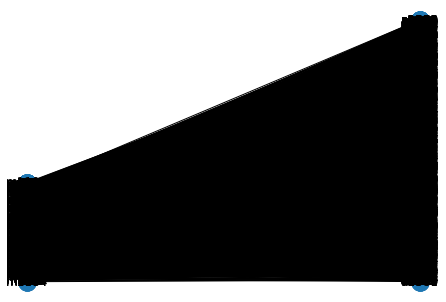

In [10]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [11]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [12]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [0]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [14]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [0]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

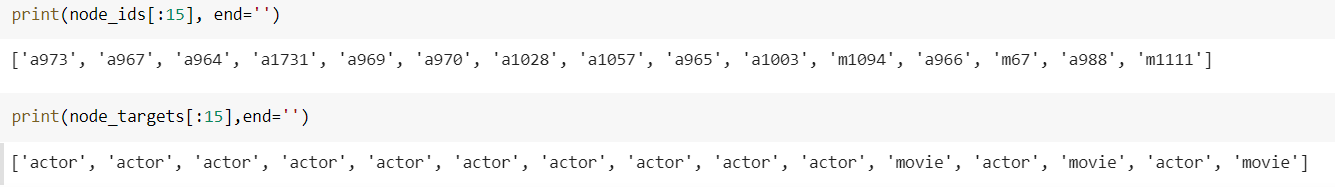

In [0]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    actor_nodes = [i for i in node_ids if 'a' in i]
    movie_nodes = [i for i in node_ids if 'm' in i]
    # Create a list to store movie and actor indices
    indice_movie_nodes =[]
    indice_actor_nodes =[]

    for i in range(0, len(node_targets)):
      if node_targets[i]=='actor':
        indice_actor_nodes.append(i)
      else:
        indice_movie_nodes.append(i)

    actor_embeddings = node_embeddings[np.asarray(indice_actor_nodes),:]
    movie_embeddings = node_embeddings[np.asarray(indice_movie_nodes),:]


    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings



In [0]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Graded function - 1</font>

In [18]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Graded function - 2</font>

In [19]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [0]:
 '''In this function, we will calculate cost1'''
def cost1(graph,number_of_clusters):
  cost1=0
  #for i in number_of_clusters:
  numerator= max(nx.connected_components(graph), key=len)
  denominator = len(graph.nodes)
  cost1+= len(numerator) /denominator
  return cost1/number_of_clusters



# Task-1

In [21]:
from sklearn.cluster import KMeans

number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]

for cl in number_of_clusters:
  kmeans = KMeans(n_clusters=cl)
  kmeans.fit(actor_embeddings)

  cluster_number_for_data_point = kmeans.labels_

  list_of_all_cluster=[]

  unique = np.unique(cluster_number_for_data_point)
  dict_of_actor_nodes = dict(zip(actor_nodes, cluster_number_for_data_point))

  for number in unique:
    cluster=[]
    for node, cluster_number in dict_of_actor_nodes.items():
      if cluster_number == number:
        cluster.append(node)
    list_of_all_cluster.append(cluster)

  # calculate cost1 and cost2 
  cost1=0
  cost2=0

  for cluster_ in list_of_all_cluster:
    G= nx.Graph()
    for actor_node in cluster_:
      sub_graph = nx.ego_graph(B,actor_node)
      G.add_nodes_from(sub_graph.nodes())
      G.add_edges_from(sub_graph.edges())
    numerator= max(nx.connected_components(G), key=len)
    #print(len(numerator))
    denominator = len(G.nodes)
    cost1 += len(numerator) /denominator
    numerator_cost2= len(G.edges())
    # Here grap
    # Create empty list
    lst=[]
    # storing movie nodes
    for i in G.nodes():
      if "m" in i:
        lst.append(i)
    denominator_cost2 = len(lst)
    cost2 += numerator_cost2 /denominator_cost2
    
  #print("cost-1:",i,cost1/len(list_of_all_cluster))
  #print("cost-2:",i,cost2/len(list_of_all_cluster))
  print("cluster of cost " ,cl ,(cost1/len(list_of_all_cluster))* (cost2/len(list_of_all_cluster)))

cluster of cost  3 3.7790343485084987
cluster of cost  5 3.0017552340870384
cluster of cost  10 2.3414174910251733
cluster of cost  30 1.6762169227182702
cluster of cost  50 1.5319099235460976
cluster of cost  100 1.5503596851493624
cluster of cost  200 1.6757505647807618
cluster of cost  500 1.7957707434061


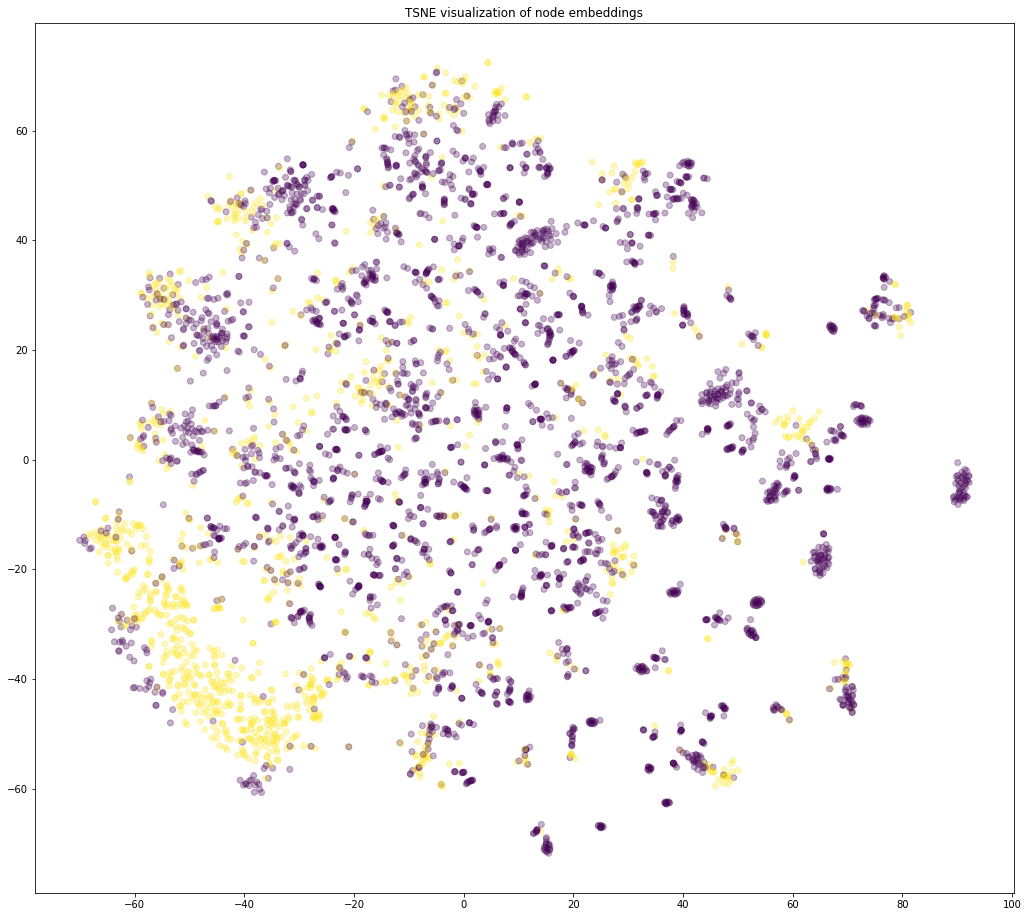

In [22]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

import numpy as np
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [ label_map[target] for target in node_targets]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

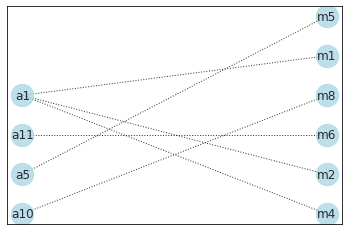

In [37]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Graded function - 3</font>

In [40]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
  assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
  return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [0]:
def cost2(graph,number_of_clusters):
  cost2 =0.0
  numerator_cost2= len(graph.edges())
  # Here grap
  # Create empty list
  lst=[]
  # storing movie nodes
  for i in graph.nodes():
    if "m" in i:
      lst.append(i)
  denominator_cost2 = len(lst)
  cost2 += numerator_cost2 /denominator_cost2
  return cost2/number_of_clusters

<font color='cyan'>Graded function - 4</font>

In [29]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
  assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
  return True
grader_cost2(graded_cost2)

True

# Task-2

In [30]:
number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]

for cl in number_of_clusters:
  kmeans = KMeans(n_clusters=cl)
  kmeans.fit(movie_embeddings)

  cluster_number_for_data_point = kmeans.labels_

  list_of_all_cluster=[]

  unique = np.unique(cluster_number_for_data_point)
  dict_of_movie_nodes = dict(zip(movie_nodes, cluster_number_for_data_point))

  for number in unique:
    cluster=[]
    for node, cluster_number in dict_of_movie_nodes.items():
      if cluster_number == number:
        cluster.append(node)
    list_of_all_cluster.append(cluster)

  # calculate cost1 and cost2 
  cost1=0
  cost2=0

  for cluster_ in list_of_all_cluster:
    G= nx.Graph()
    for movie_node in cluster_:
      sub_graph = nx.ego_graph(B,movie_node)
      G.add_nodes_from(sub_graph.nodes())
      G.add_edges_from(sub_graph.edges())
    numerator= max(nx.connected_components(G), key=len)
    #print(len(numerator))
    denominator = len(G.nodes)
    cost1 += len(numerator) /denominator
    numerator_cost2= len(G.edges())
    # Here grap
    # Create empty list
    lst=[]
    # storing actor nodes
    for i in G.nodes():
      if "a" in i:
        lst.append(i)
    denominator_cost2 = len(lst)
    cost2 += numerator_cost2 /denominator_cost2
    
  #print("cost-1:",i,cost1/len(list_of_all_cluster))
  #print("cost-2:",i,cost2/len(list_of_all_cluster))
  print("cluster of cost " ,cl ,(cost1/len(list_of_all_cluster))* (cost2/len(list_of_all_cluster)))

cluster of cost  3 2.802690693035707
cluster of cost  5 2.5187705988030946
cluster of cost  10 2.5390002968197387
cluster of cost  30 1.9473881125278854
cluster of cost  50 1.892028975980033
cluster of cost  100 1.5635711198661166
cluster of cost  200 1.3853194870143493
cluster of cost  500 1.2064302991616633


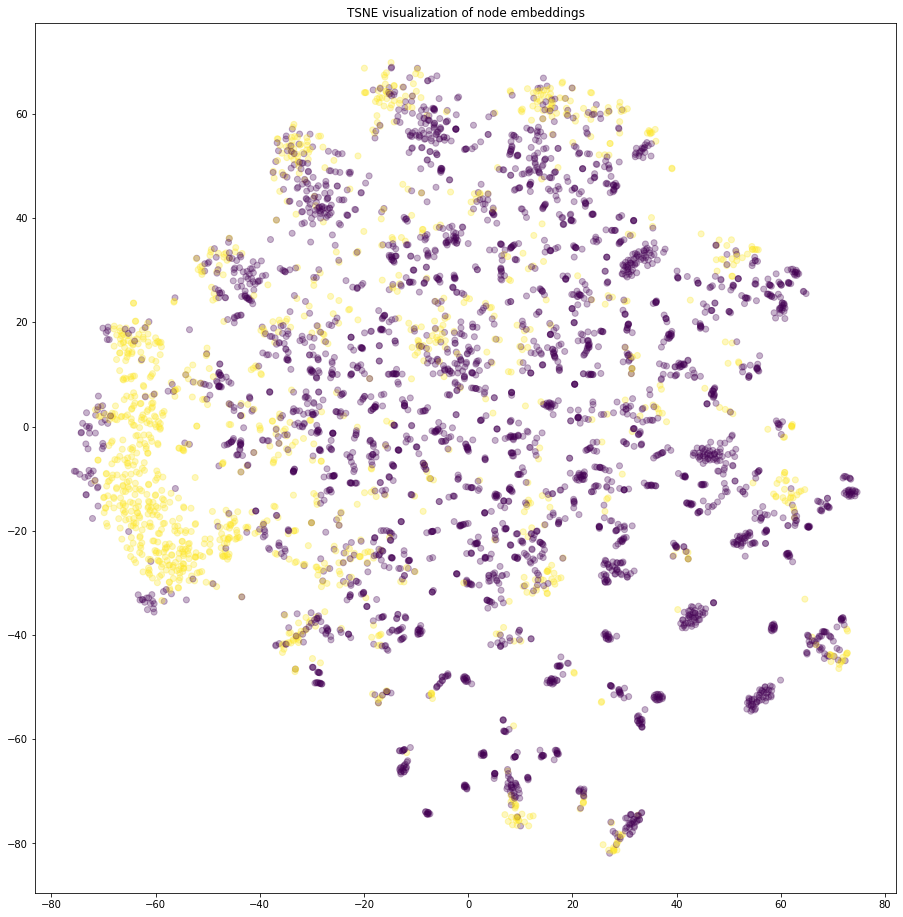

In [31]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

import numpy as np
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [ label_map[target] for target in node_targets]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

<font color='blue'>Grouping similar actors</font>

In [0]:
  kmeans = KMeans(n_clusters=3)
  kmeans.fit(actor_embeddings)

  cluster_number_for_data_point = kmeans.labels_

  list_of_all_cluster=[]

  unique = np.unique(cluster_number_for_data_point)
  dict_of_actor_nodes = dict(zip(actor_nodes, cluster_number_for_data_point))

  for number in unique:
    cluster=[]
    for node, cluster_number in dict_of_actor_nodes.items():
      if cluster_number == number:
        cluster.append(node)
    list_of_all_cluster.append(cluster)

<font color='blue'>Displaying similar actor clusters</font>

In [33]:
for cluster_a in list_of_all_cluster:
  print(cluster_a)

['a973', 'a967', 'a964', 'a970', 'a969', 'a965', 'a1028', 'a1003', 'a1057', 'a959', 'a966', 'a988', 'a1037', 'a49', 'a962', 'a93', 'a971', 'a963', 'a1030', 'a1016', 'a960', 'a977', 'a1027', 'a204', 'a472', 'a968', 'a1035', 'a1004', 'a1020', 'a1026', 'a975', 'a138', 'a306', 'a972', 'a1036', 'a1008', 'a1031', 'a987', 'a205', 'a1015', 'a1038', 'a1021', 'a782', 'a1467', 'a976', 'a1011', 'a974', 'a1060', 'a1750', 'a1005', 'a228', 'a1018', 'a1029', 'a1032', 'a1023', 'a1024', 'a1039', 'a1025', 'a1043', 'a1019', 'a989', 'a1063', 'a1034', 'a1047', 'a1045', 'a1048']
['a2715', 'a1505', 'a400', 'a1672', 'a1483', 'a1017', 'a1716', 'a1782', 'a1041', 'a95', 'a1022', 'a1042', 'a1513', 'a1083', 'a217', 'a2349', 'a152', 'a638', 'a22', 'a1040', 'a239', 'a316', 'a538', 'a2361', 'a1593', 'a144', 'a2374', 'a1033', 'a1911', 'a2460', 'a2785', 'a1490', 'a1704', 'a2030', 'a2181', 'a2009', 'a129', 'a1468', 'a2301', 'a961', 'a1877', 'a1006', 'a2416', 'a2755', 'a2491', 'a2367', 'a1061', 'a1763', 'a1376', 'a1078', 

<font color='blue'>Grouping similar movies</font>

In [0]:
  kmeans = KMeans(n_clusters=3)
  kmeans.fit(movie_embeddings)

  cluster_number_for_data_point = kmeans.labels_

  list_of_all_cluster=[]

  unique = np.unique(cluster_number_for_data_point)
  dict_of_movie_nodes = dict(zip(movie_nodes, cluster_number_for_data_point))

  for number in unique:
    cluster=[]
    for node, cluster_number in dict_of_movie_nodes.items():
      if cluster_number == number:
        cluster.append(node)
    list_of_all_cluster.append(cluster)


<font color='blue'>Displaying similar movie clusters</font>

In [35]:
for cluster_m in list_of_all_cluster:
  print(cluster_m)

['m983', 'm914', 'm1348', 'm294', 'm973', 'm282', 'm1331', 'm850', 'm306', 'm1159', 'm345', 'm1374', 'm1336', 'm340', 'm653', 'm716', 'm936', 'm560', 'm310', 'm624', 'm704', 'm901', 'm909', 'm623', 'm729', 'm692', 'm851', 'm866', 'm947', 'm305', 'm932', 'm169', 'm307', 'm974', 'm1314', 'm1311', 'm311', 'm943', 'm707', 'm281', 'm715', 'm875', 'm1189', 'm830', 'm941', 'm626', 'm283', 'm293', 'm1034', 'm1036', 'm847', 'm799', 'm1152', 'm260', 'm290', 'm840', 'm288', 'm1339', 'm650', 'm856', 'm1081', 'm1044', 'm812', 'm1192', 'm848', 'm702', 'm913', 'm706', 'm1366', 'm621', 'm343', 'm284', 'm655', 'm940', 'm291', 'm723', 'm719', 'm944', 'm903', 'm544', 'm1014', 'm933', 'm966', 'm353', 'm899', 'm265', 'm27', 'm809', 'm625', 'm1347', 'm882', 'm350', 'm666', 'm537', 'm248', 'm240', 'm1064', 'm857', 'm366', 'm303', 'm662', 'm1140', 'm1008', 'm962', 'm362', 'm911', 'm361', 'm667', 'm349', 'm1349', 'm649', 'm876', 'm1040', 'm292', 'm713', 'm926', 'm627', 'm1147', 'm931', 'm1328', 'm1361', 'm910'